## Deep Learning Project : Chessboard Position Classification

#### Introduction

The game of chess can be divided into three phases: the opening, the middle game, and the endgame.

##### Opening


The opening is the initial stage of the game, where players develop their pieces, control the center of the board, and prepare for the middle game. The opening typically ends when the major pieces (queen, rooks) are brought out and the king is castled (put into a safe position).

Examples :

<table><td> <img src="op/1"> </td><td> <img src="op/2"> </td><td> <img src="op/3"> </td></table>

##### Middle Game

The middle game is the stage where most of the action takes place. Players maneuver their pieces to gain control of the board, attack their opponent's pieces, and defend their own pieces. This is the stage where players try to create and exploit weaknesses in their opponent's position. 

Examples:

<table><td> <img src="mg/1.png" width = "400px"> </td><td> <img src="mg/2.png" width = "400px"> </td><td> <img src="mg/3.png" width = "400px"> </td></table>

#### End Game

The endgame is the final stage of the game, where there are fewer pieces on the board and the focus is on promoting pawns, getting the king to a safe position, and creating mating threats.

Examples : 

<table><td> <img src="eg/1.jpg" width = "400px"> </td><td> <img src="eg/2.jpg" width = "400px"> </td><td> <img src="eg/3.jpg" width = "400px"> </td></table>

### Objectif

The objective is building a chess model for classifying the stage of the game as opening, middle game, or endgame based on the input image of the chessboard.

##  Images classification 

Why Convolutional Neural Networks (CNNs) ?

<table>
    <td> 
        <img src="ex1.png"> 
    </td>
    <td> 
        <img src="ex2.png">
    </td>
</table>

The power of CNNs comes from their ability to learn and extract features from images, using a series of convolutional layers and pooling layers. The convolutional layers apply a series of filters to the input image, which help to identify local patterns and features in the image. The pooling layers then reduce the dimensionality of the feature maps, making the network more efficient and effective.

## 1-Convolution :

#### 1-1 Mathematically


In mathematics, convolution is an operation on two functions that produces a third function, which is typically a way to combine or mix the two input functions. The convolution of two functions, f(x) and g(x), is defined as the integral of the product of the two functions, after one of them is flipped and shifted by a certain amount.

The resulting function, h(x), is given by:

h(x) = ∫ f(t) g(x - t) dt

In other words, we take one of the functions, say g(x), and we shift it by a certain amount (t) and multiply it with the other function, f(t), and then integrate over all possible values of t. This process is repeated for different values of x, resulting in the convolution function, h(x).

The convolution operation is often used in signal processing, image processing, and other areas of engineering and science where it is important to analyze the relationship between two signals or functions. For example, in image processing, convolution can be used to blur or sharpen an image, or to apply various image filters such as edge detection, noise reduction, and smoothing.

Convolution is a powerful tool in mathematics and has many important applications in various fields.

<table>
    <td> 
        <img src="conv.gif"> 
    </td>
    <td> 
        <img src="conv2.gif">
    </td>
</table>

Example : 
<img src="convEx.png">

####  1-2 Convolutions on images
<img src="convImg.png">
<img src="filtrs.png">
The result of the convolution is a new image, where each pixel value is the sum of the products between the kernel values and the underlying pixel intensities in the image patch centered at that pixel. The size of the kernel determines the size of the image patch, and the values of the kernel determine the type of convolution operation performed.

The most common applications of convolution in image processing include:

    Image smoothing or blurring: Convolution with a Gaussian kernel is often used to smooth an image, which reduces the high-frequency noise and enhances the low-frequency details.

    Edge detection: Convolution with a derivative of Gaussian (DoG) kernel or Sobel kernel is often used to detect edges in an image, which highlights the areas of rapid change in intensity.

    Image sharpening: Convolution with a Laplacian kernel or an unsharp masking kernel can be used to enhance the edges and details in an image, which makes it appear sharper.
    
####  1-3 Convolutions on images (Padding)
<img src="padding.png">


#### 1-4 Pooling

Pooling, also known as downsampling, is a common operation used in convolutional neural networks (CNNs) for image processing and computer vision tasks. The purpose of pooling is to reduce the dimensionality of the feature maps produced by the convolutional layers, while retaining the most important information.
<img src="pol.png">

#### 1-4-1  Max Pooling
<img src="max.png">

#### 1-4-2 Average Pooling
<img src="avg.png">

## 2- VGG19 Architecture
<img src="vgg19.png">
<img src="table.png">

VGG-19 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 19 layers deep and can classify images into 1000 object categories, such as a keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images.

## Implementation

In [83]:
# Import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

import os
from IPython.display import Image
import numpy
from glob import glob
import matplotlib.pyplot as plt

In [84]:
IMAGE_SIZE = [224,224]
BATCH_SIZE = 20

train_path = "dataset/Images/Train/"
test_path = "dataset/Images/Test/"

In [85]:
# Create an instance of the VGG19 model
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))

In [86]:
# désactive l'apprentissage pour les couches du modèle pré-entraîné.
for layer in vgg_model.layers:
    layer.trainable = False

In [87]:
# récupère les noms de toutes les classes (dossiers) dans le dossier contenant les images d'entraînement.
folders = os.listdir(train_path)

In [88]:
# ajoute une couche d'aplatissement au modèle.
x = Flatten()(vgg_model.output)

In [89]:
# ajoute une couche de sortie au modèle avec une fonction d'activation softmax.
prediction = Dense(len(folders), activation="softmax")(x)

In [90]:
# crée un nouveau modèle en spécifiant les entrées et les sorties.
model = Model(inputs=vgg_model.input, outputs=prediction)

In [91]:
# compile le modèle en spécifiant la fonction de perte, l'optimiseur et les métriques d'évaluation.
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [92]:
# Crée un objet ImageDataGenerator pour augmenter les données d'entraînement.
train_datagen = ImageDataGenerator(rescale = 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True)




In [93]:
# Crée un objet ImageDataGenerator pour normaliser les données de test.
test_datagen = ImageDataGenerator(rescale = 1./255)




In [94]:
# prépare un générateur de données pour les images d'entraînement.
train_set = train_datagen.flow_from_directory(train_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = "categorical")


Found 110 images belonging to 3 classes.


In [95]:


# prépare un générateur de données pour les images de test.
test_set = test_datagen.flow_from_directory(test_path,
                                          target_size = IMAGE_SIZE,
                                          batch_size = BATCH_SIZE,
                                          class_mode = "categorical")


Found 20 images belonging to 3 classes.


In [96]:

# ajuste le modèle sur les données d'entraînement et d'évaluation en utilisant les générateurs de données.
r = model.fit(train_set,
          validation_data = test_set,
          epochs = 20,
          steps_per_epoch = len(train_set),
          validation_steps = len(test_set),
          )

Epoch 1/20
6/6 [==============================] - 20s 3s/step - loss: 2.1947 - accuracy: 0.2273 - val_loss: 0.9404 - val_accuracy: 0.6500
Epoch 2/20
6/6 [==============================] - 19s 3s/step - loss: 0.9398 - accuracy: 0.5818 - val_loss: 0.4508 - val_accuracy: 0.8000
Epoch 3/20
6/6 [==============================] - 19s 3s/step - loss: 0.5647 - accuracy: 0.7273 - val_loss: 0.2921 - val_accuracy: 0.8500
Epoch 4/20
6/6 [==============================] - 19s 3s/step - loss: 0.3281 - accuracy: 0.8909 - val_loss: 0.2996 - val_accuracy: 0.9000
Epoch 5/20
6/6 [==============================] - 20s 3s/step - loss: 0.2859 - accuracy: 0.8818 - val_loss: 0.1705 - val_accuracy: 0.9500
Epoch 6/20
6/6 [==============================] - 20s 3s/step - loss: 0.1749 - accuracy: 0.9364 - val_loss: 0.1846 - val_accuracy: 0.9500
Epoch 7/20
6/6 [==============================] - 20s 3s/step - loss: 0.1392 - accuracy: 0.9636 - val_loss: 0.1393 - val_accuracy: 0.9500
Epoch 8/20
6/6 [==================

In [97]:
# Garder VGG19 Model 
model.save('vgg_19.h5')

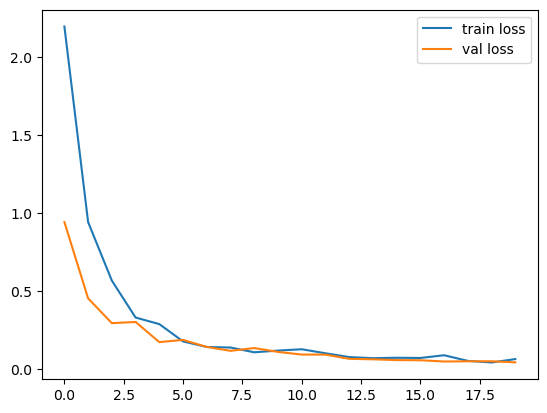

In [98]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

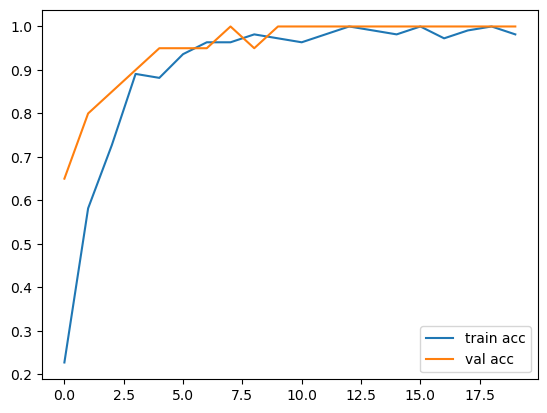

In [99]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

1/1 [==============================] - 0s 257ms/step


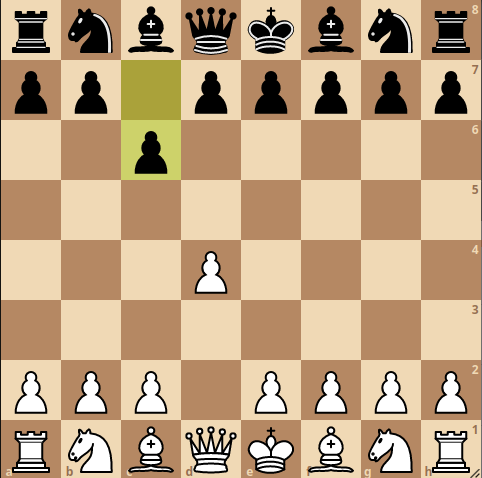

 Opening
1/1 [==============================] - 0s 152ms/step


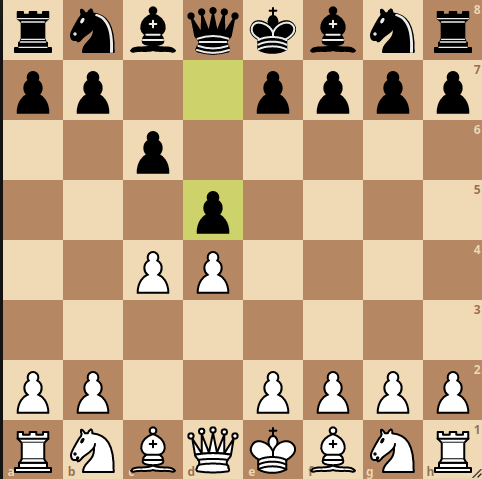

 Opening
1/1 [==============================] - 0s 162ms/step


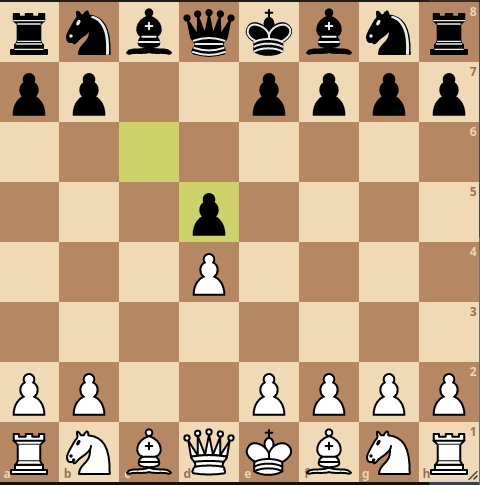

 Opening
1/1 [==============================] - 0s 165ms/step


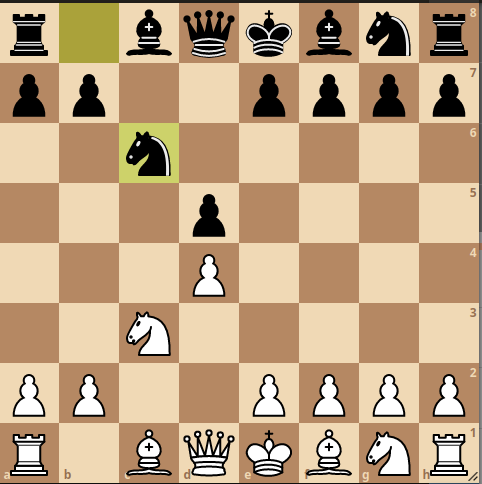

 Opening
1/1 [==============================] - 0s 153ms/step


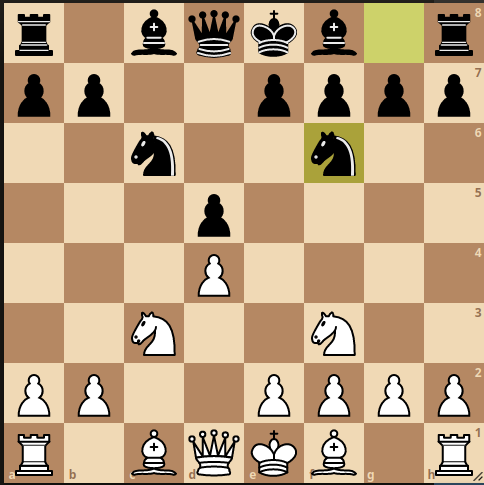

 Opening
1/1 [==============================] - 0s 195ms/step


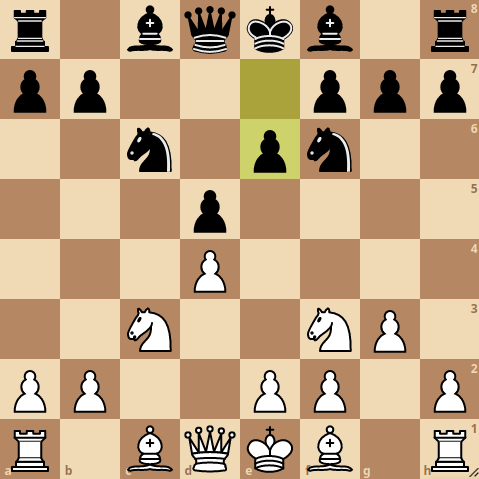

 Opening
1/1 [==============================] - 0s 175ms/step


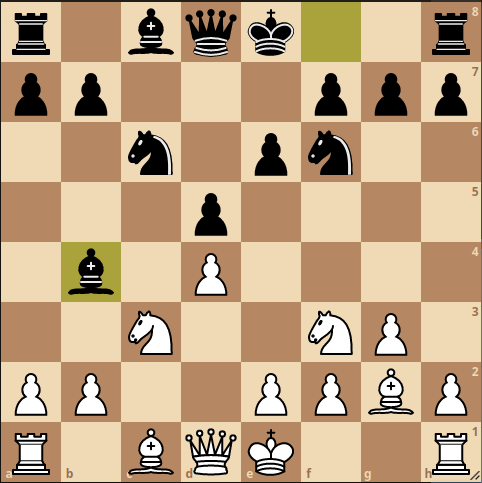

 Opening
1/1 [==============================] - 0s 161ms/step


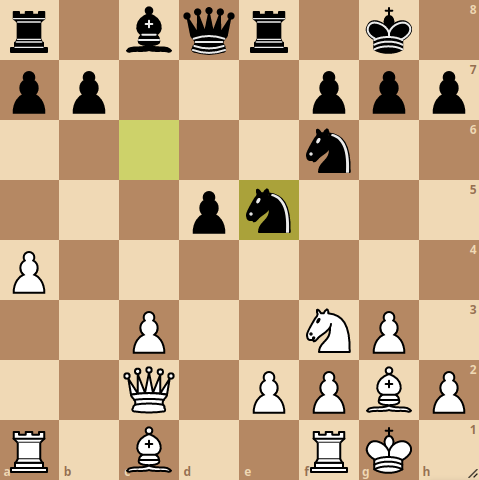

 Middle-game
1/1 [==============================] - 0s 161ms/step


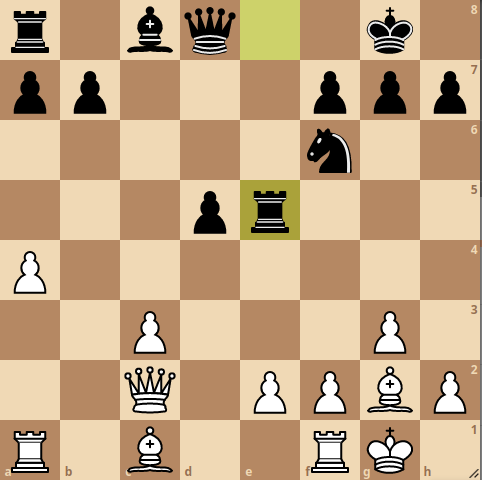

 Middle-game
1/1 [==============================] - 0s 164ms/step


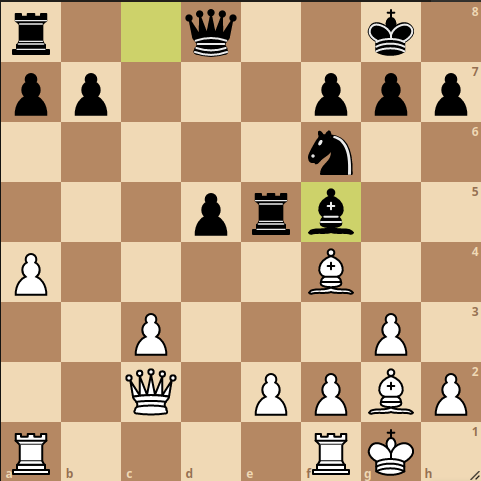

 Middle-game
1/1 [==============================] - 0s 193ms/step


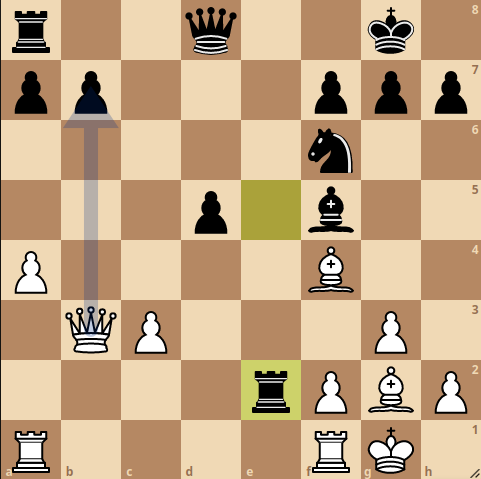

 Middle-game
1/1 [==============================] - 0s 191ms/step


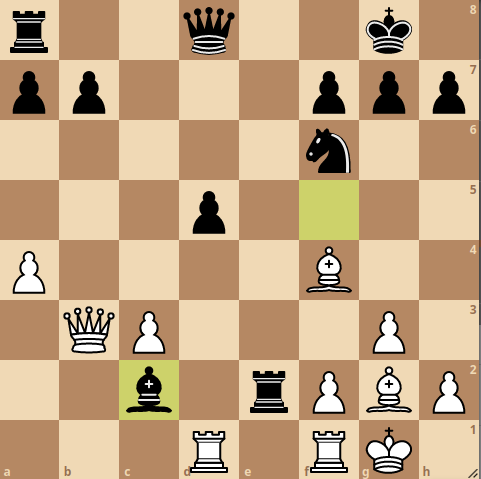

 Middle-game
1/1 [==============================] - 0s 152ms/step


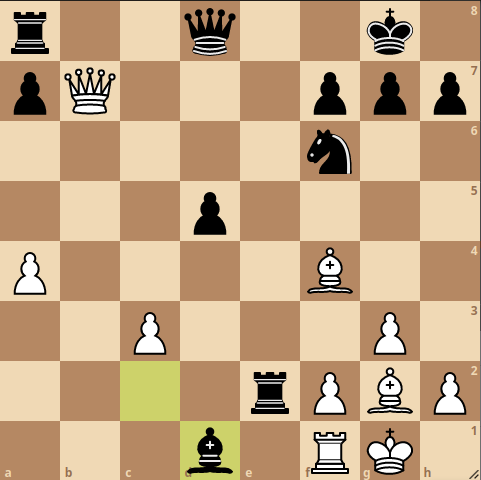

 Middle-game
1/1 [==============================] - 0s 153ms/step


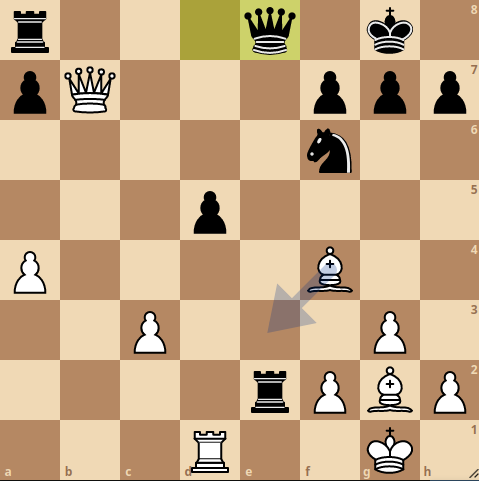

 Middle-game
1/1 [==============================] - 0s 179ms/step


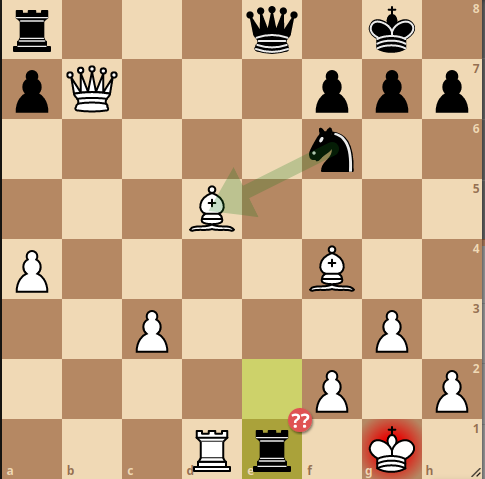

 Middle-game
1/1 [==============================] - 0s 173ms/step


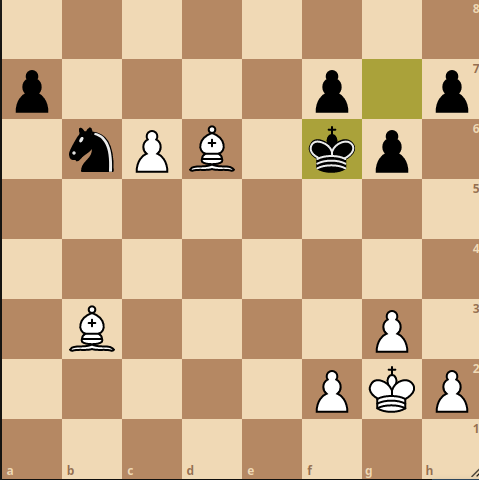

 End-game
1/1 [==============================] - 0s 167ms/step


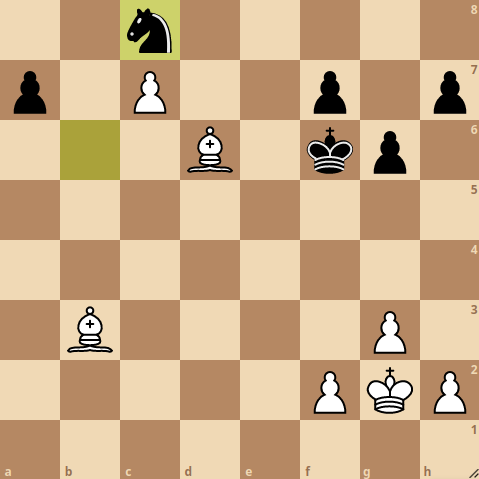

 End-game
1/1 [==============================] - 0s 151ms/step


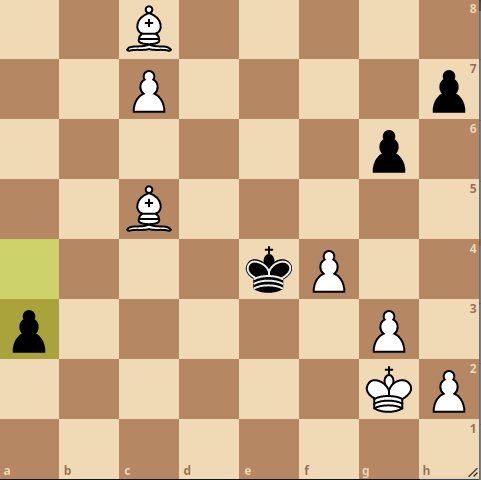

 End-game
1/1 [==============================] - 0s 157ms/step


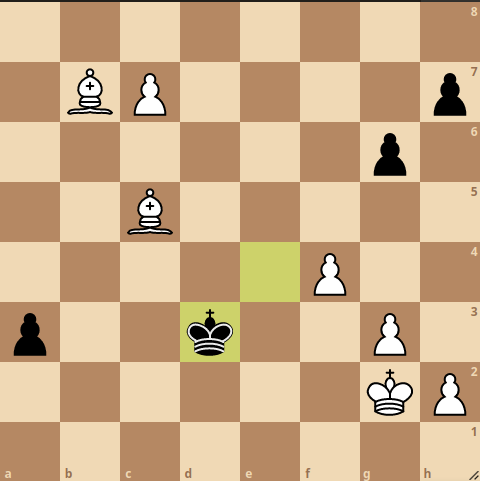

 End-game
1/1 [==============================] - 0s 166ms/step


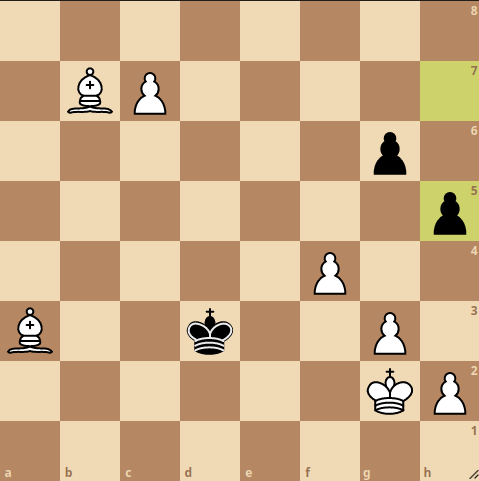

 End-game
1/1 [==============================] - 0s 163ms/step


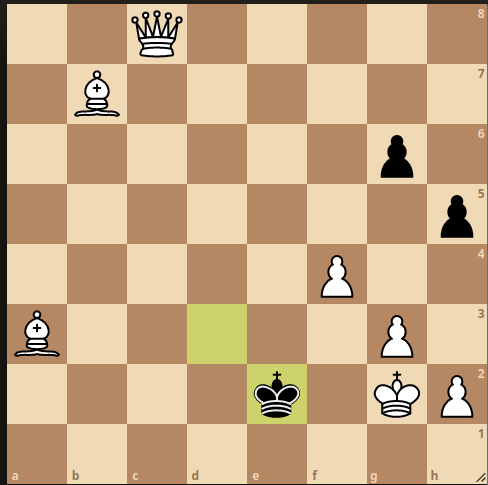

 End-game


In [108]:
MODEL_PATH = 'vgg_19.h5'
from IPython.display import Image, display
# Chargement de modele
model = load_model(MODEL_PATH)
for i in range(1,22):
    path = ("game1/"+str(i)+".png")
    # charge l'image , et la redimensionne à une taille de 224x224 pixels.
    img = image.load_img(path, target_size=(224, 224))

    # convertit l'image en un tableau .
    x = image.img_to_array(img)

    # normalise les valeurs du matrice entre 0 et 1.
    x = x/255

    # ajoute une dimension supplémentaire au tableau pour qu'il soit compatible avec le modèle.
    x = numpy.expand_dims(x, axis=0)

    # utilise le modèle pour prédire la classe de l'image.
    pred = model.predict(x)

    # retourne l'indice de la classe prédite ayant la plus grande probabilité.
    pred = numpy.argmax(pred, axis=1)

    # assigne la valeur de la classe prédite à la variable "arg_pred".
    arg_pred = pred[0]
    # renvoie une liste de noms de fichiers présents dans le répertoire "Test" du dataset.
    display(Image(filename=path))
    print (' ' + os.listdir('dataset/Images/Test/')[arg_pred].capitalize())